# Module 5 Live Coding Assignment:
## Linear Regression: Interactions and Transformations
Vika Vijayanand

## Question 1
#### Read the dataset “avocado.csv” and save it in a variable called “df”. Use the basic EDA functions to analyze the dataset.

In [ ]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/vika//Data_Science/Dartmouth Thayer_Data Science_Module 5_Live Coding Assignment/avocado.csv')

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 2
#### Drop unnecessary and erroneous columns from the dataframe. Do some feature engi- neering on the “date” column so you are able to use the day and the month columns in building our machine learning model later.


In [7]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.drop('Unnamed: 0', axis = 1).head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [11]:
df['Month'] = df["Date"].apply(lambda x: x.month)
df['Year'] = df["Date"].apply(lambda x: x.year)

In [12]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015


## 3
#### Plot the Avocado’s Average Price through the Date column. You will need to perform a “groupby” operation to do this.

In [13]:
by_date = df.groupby('Date').mean()

<function matplotlib.pyplot.show(*args, **kw)>

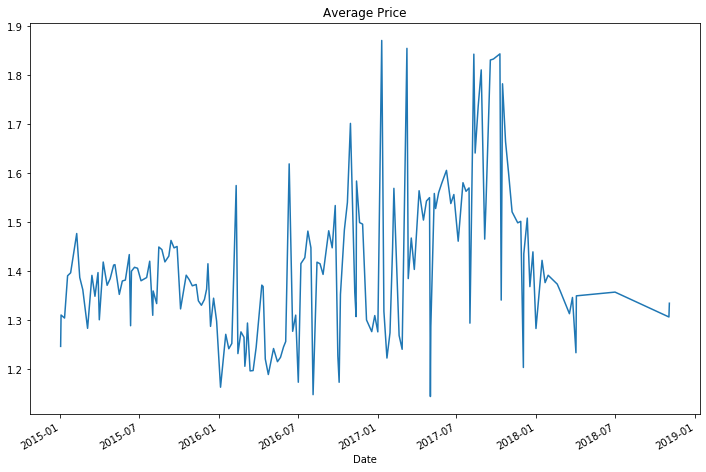

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
by_date['AveragePrice'].plot()
plt.title('Average Price')
plt.show

## 4
#### Get the correlation matrix and plot it for all the numerical columns in the dataframe. Which variables are the most correlated with the “AveragePrice”? Which variables are highly correlated with others

In [15]:
import seaborn as sns
%matplotlib inline

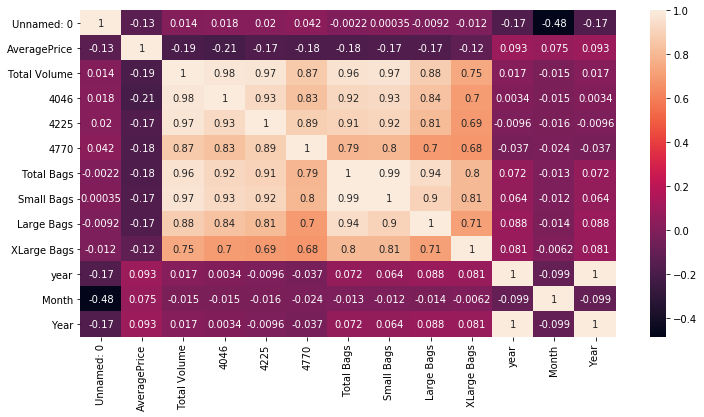

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

## 5
#### Using the Shapiro-Wilks test build a function to see if a specific column follows a normal distribution or not. If not, using the Box-Cox or Yeo-Johnson transform them to follow a normal distribution. Save your dataset as “df norm”.

In [17]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015


In [18]:
df_final = pd.get_dummies(df.drop(['region', 'Date'], axis = 1), drop_first=True)

In [22]:
from scipy import stats
def assert_normality(data):
    statistic, pvalue = stats.shapiro(data)
    print('shapiro Statistic' + str(statistic) + 'and p-value' + str(pvalue))
    if pvalue >.05:
        print("Normal")
        return True
    else:
        print("Not normal")
        return False
    
    

In [23]:
for column in df_final.columns:
    print(column+'\n')
    assert_normality(df_final[column])
    print('\n')

Unnamed: 0

shapiro Statistic0.9453453421592712and p-value0.0
Not normal


AveragePrice

shapiro Statistic0.9786123633384705and p-value2.802596928649634e-45
Not normal


Total Volume

shapiro Statistic0.22077226638793945and p-value0.0
Not normal


4046

shapiro Statistic0.22068005800247192and p-value0.0
Not normal


4225

shapiro Statistic0.2242574691772461and p-value0.0
Not normal


4770

shapiro Statistic0.20288842916488647and p-value0.0
Not normal


Total Bags

shapiro Statistic0.2150733470916748and p-value0.0
Not normal


Small Bags

shapiro Statistic0.21889489889144897and p-value0.0
Not normal


Large Bags

shapiro Statistic0.20609456300735474and p-value0.0
Not normal


XLarge Bags

shapiro Statistic0.1595591902732849and p-value0.0
Not normal


year

shapiro Statistic0.8435542583465576and p-value0.0
Not normal


Month

shapiro Statistic0.9348240494728088and p-value0.0
Not normal


Year

shapiro Statistic0.8435542583465576and p-value0.0
Not normal


type_organic

shapiro Statistic0

/Users/vika/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
for column in df_final.columns:
    df_final[column]= df_final[column].astype(float)
    df_final[column]= stats.yeojohnson(df_final[column])[0]

In [26]:
df_norm = df_final

## 6
#### Using the RFE method from “scikit-learn” get the best five (5) variables to predict the “AveragePrice” for the avocados.

In [27]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

In [28]:
y = df_norm['AveragePrice']
X = df_norm.drop('AveragePrice', axis = 1)

In [29]:
lr = linear_model.LinearRegression()
rfe = RFE(lr, n_features_to_select= 5)
rfe.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [30]:
print("features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

features sorted by their rank:
[(1, 'Small Bags'), (1, 'Total Bags'), (1, 'Year'), (1, 'type_organic'), (1, 'year'), (2, 'Total Volume'), (3, '4225'), (4, 'Month'), (5, 'Large Bags'), (6, '4770'), (7, 'Unnamed: 0'), (8, 'XLarge Bags'), (9, '4046')]


## 7
#### Divide your data into a training and a test dataset. Then using the best five (5) variables from above perform a linear regression to predict the “AveragePrice” for the avocados. Get the MSE, MAE y RSME for your model.

In [33]:
X = df_norm[['4225', 'Month', 'Total Volume', 'type_organic', 'year']] 
y = df_norm['AveragePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =.2, random_state = 123)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [39]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0687217129506091
MSE: 0.0077615293622937415
RMSE: 0.08809954235008115
